In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  s

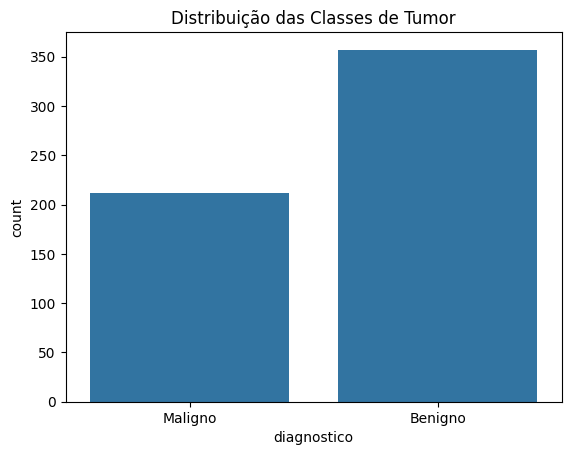

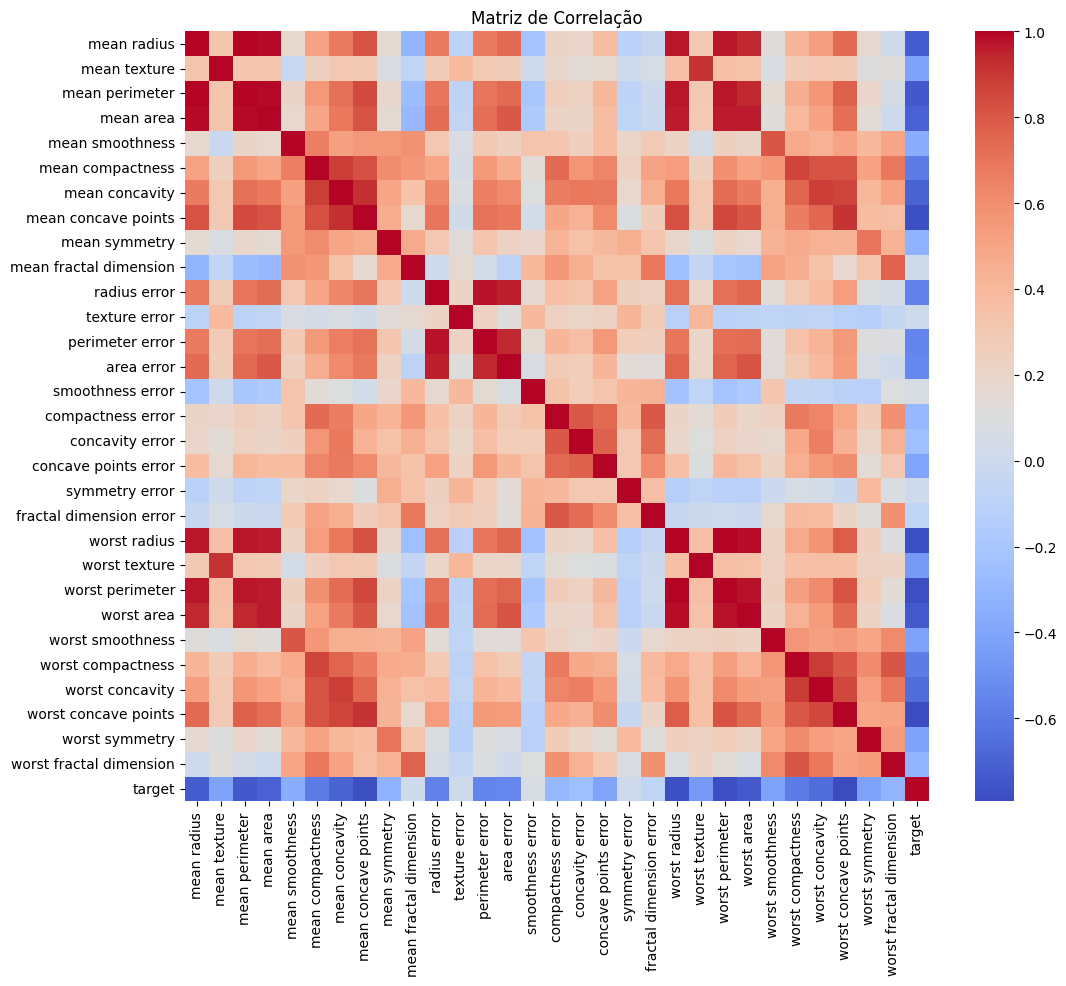

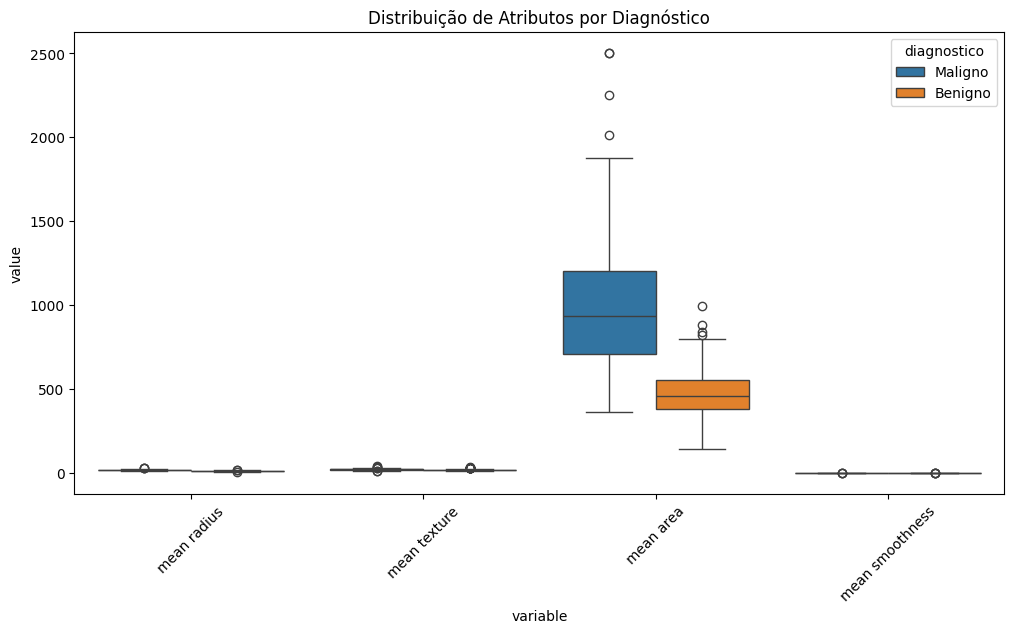

In [ ]:

# Carregar o dataset
dados = load_breast_cancer()
df = pd.DataFrame(dados.data, columns=dados.feature_names)
df['target'] = dados.target

# Mapear os rótulos
df['diagnostico'] = df['target'].map({0: 'Maligno', 1: 'Benigno'})

# Exibir informações básicas
print("\nInformações do dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe().T)

print("\nContagem de classes:")
print(df['diagnostico'].value_counts())

# Gráfico da distribuição das classes
sns.countplot(x='diagnostico', data=df)
plt.title('Distribuição das Classes de Tumor')
plt.show()

# Matriz de correlação das principais variáveis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Boxplot de algumas variáveis importantes
atributos = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']
df_melt = df.melt(id_vars='diagnostico', value_vars=atributos)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melt, x='variable', y='value', hue='diagnostico')
plt.title('Distribuição de Atributos por Diagnóstico')
plt.xticks(rotation=45)
plt.show()


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(['target', 'diagnostico'], axis=1)
y = df['target']

k_best = SelectKBest(score_func=f_classif, k=10)
k_best.fit(X, y)

# Ranking das melhores variáveis
import numpy as np
melhores = pd.Series(k_best.scores_, index=X.columns).sort_values(ascending=False)
print(melhores.head(10))


worst concave points    964.385393
worst perimeter         897.944219
mean concave points     861.676020
worst radius            860.781707
mean perimeter          697.235272
worst area              661.600206
mean radius             646.981021
mean area               573.060747
mean concavity          533.793126
worst concavity         436.691939
dtype: float64


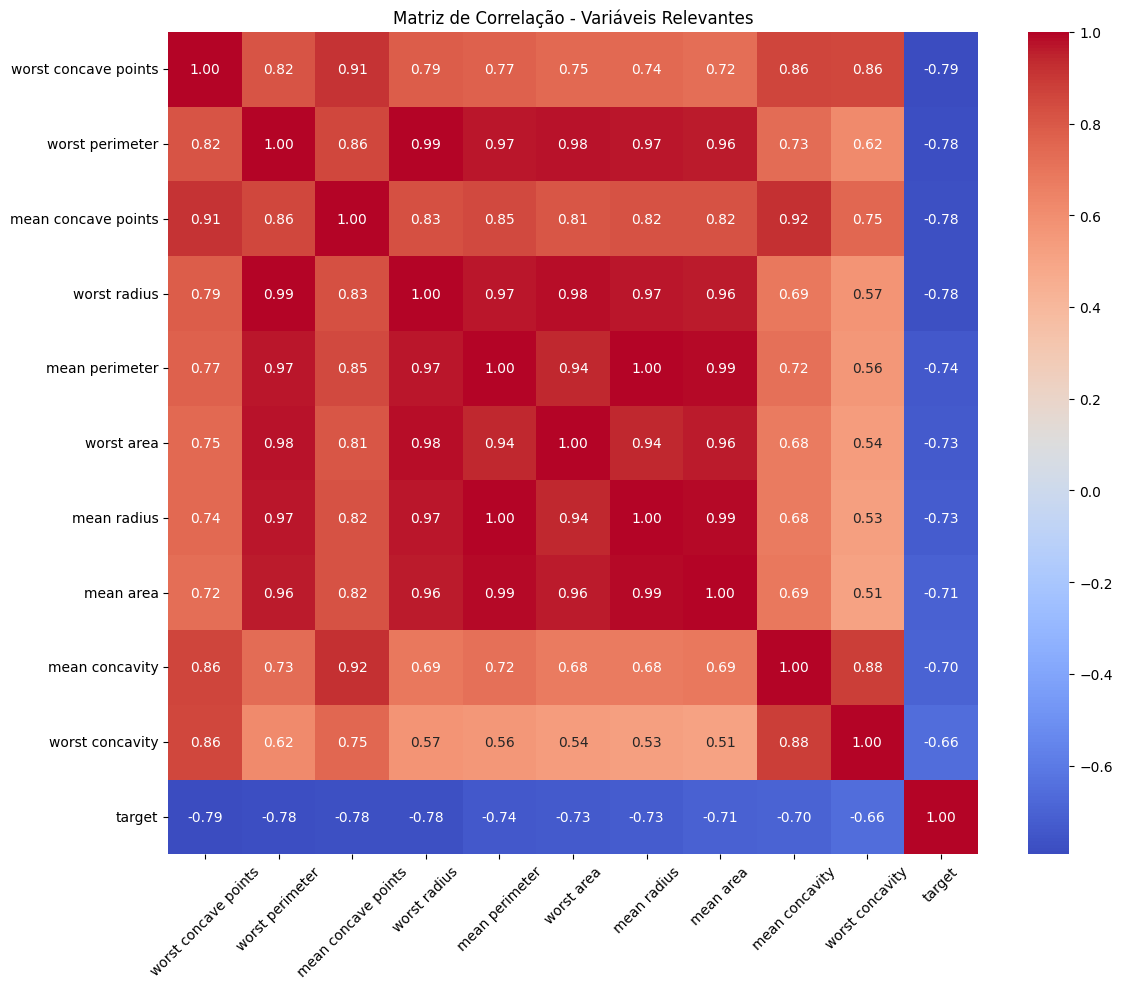

In [ ]:

# Selecionar apenas as 10 melhores variáveis com base na análise fornecida
melhores_variaveis = [
    'worst concave points',
    'worst perimeter',
    'mean concave points',
    'worst radius',
    'mean perimeter',
    'worst area',
    'mean radius',
    'mean area',
    'mean concavity',
    'worst concavity'
]

# Adicionar a variável target para a correlação
df_relevante = df[melhores_variaveis + ['target']]

# Plotar a nova matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df_relevante.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Variáveis Relevantes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


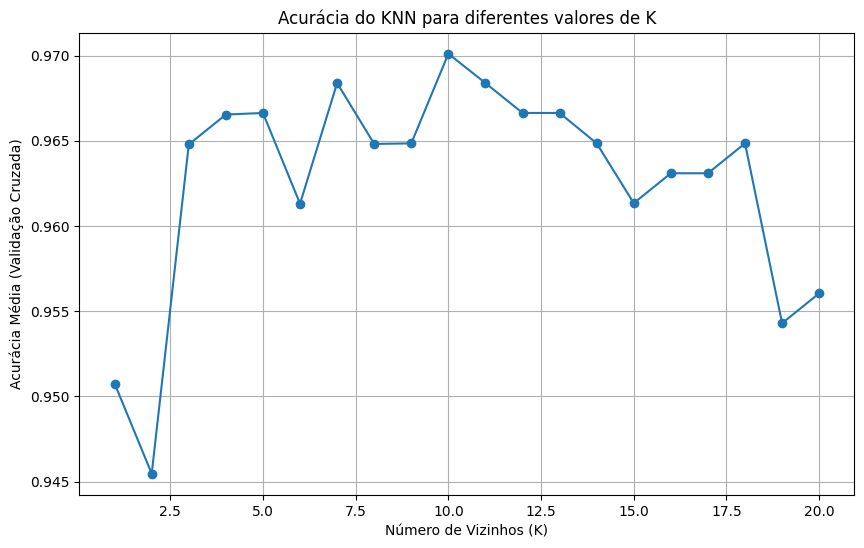

Melhor valor de K: 10 com acurácia média de 0.9701


In [12]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

escalonador = StandardScaler()
X_normalizado = escalonador.fit_transform(X)

# === 5. Avaliar KNN com validação cruzada para diferentes valores de K ===
k_valores = list(range(1, 21))
acuracias = []

for k in k_valores:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_normalizado, y, cv=10, scoring='accuracy')
    acuracias.append(scores.mean())

# === 6. Plotar curva de acurácia ===
plt.figure(figsize=(10, 6))
plt.plot(k_valores, acuracias, marker='o')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia Média (Validação Cruzada)')
plt.title('Acurácia do KNN para diferentes valores de K')
plt.grid(True)
plt.show()

# === 7. Melhor valor de K ===
melhor_k = k_valores[acuracias.index(max(acuracias))]
print(f'Melhor valor de K: {melhor_k} com acurácia média de {max(acuracias):.4f}')


In [13]:
# === PARÂMETROS ===
random_seed = 42
center_stat = 'mean'  # média como estatística central para ranking (já usada previamente)
k_min = 1
k_max = 11
ks = list(range(k_min, k_max + 2, 2))  # valores ímpares de K
distance_metric = 'euclidean'
weights = 'uniform'
palette = ['limegreen', 'indianred']  # benigno e maligno

In [14]:
# === IMPORTAÇÕES ===
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# === CARREGAR O DATASET ===
dados = load_breast_cancer()
df = pd.DataFrame(dados.data, columns=dados.feature_names)
df['target'] = dados.target
df['diagnostico'] = df['target'].map({0: 'maligno', 1: 'benigno'})

# === DEFINIR AS MELHORES FEATURES MANUALMENTE OU POR RANKING (prévia análise) ===
x_cols_sorted = [
    'worst concave points',
    'worst perimeter',
    'mean concave points',
    'worst radius',
    'mean perimeter',
    'worst area',
    'mean radius',
    'mean area',
    'mean concavity',
    'worst concavity'
]


/tmp/ipykernel_51617/1986726060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico', y=x_cols_sorted[i], data=df, ax=ax, palette=palette)
/tmp/ipykernel_51617/1986726060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico', y=x_cols_sorted[i], data=df, ax=ax, palette=palette)
/tmp/ipykernel_51617/1986726060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnostico', y=x_cols_sorted[i], data=df, ax=ax, palette=palette)
/tmp/ipykernel_51617/1986726060.py:4: FutureWarning: 

Passing `palette` without assi

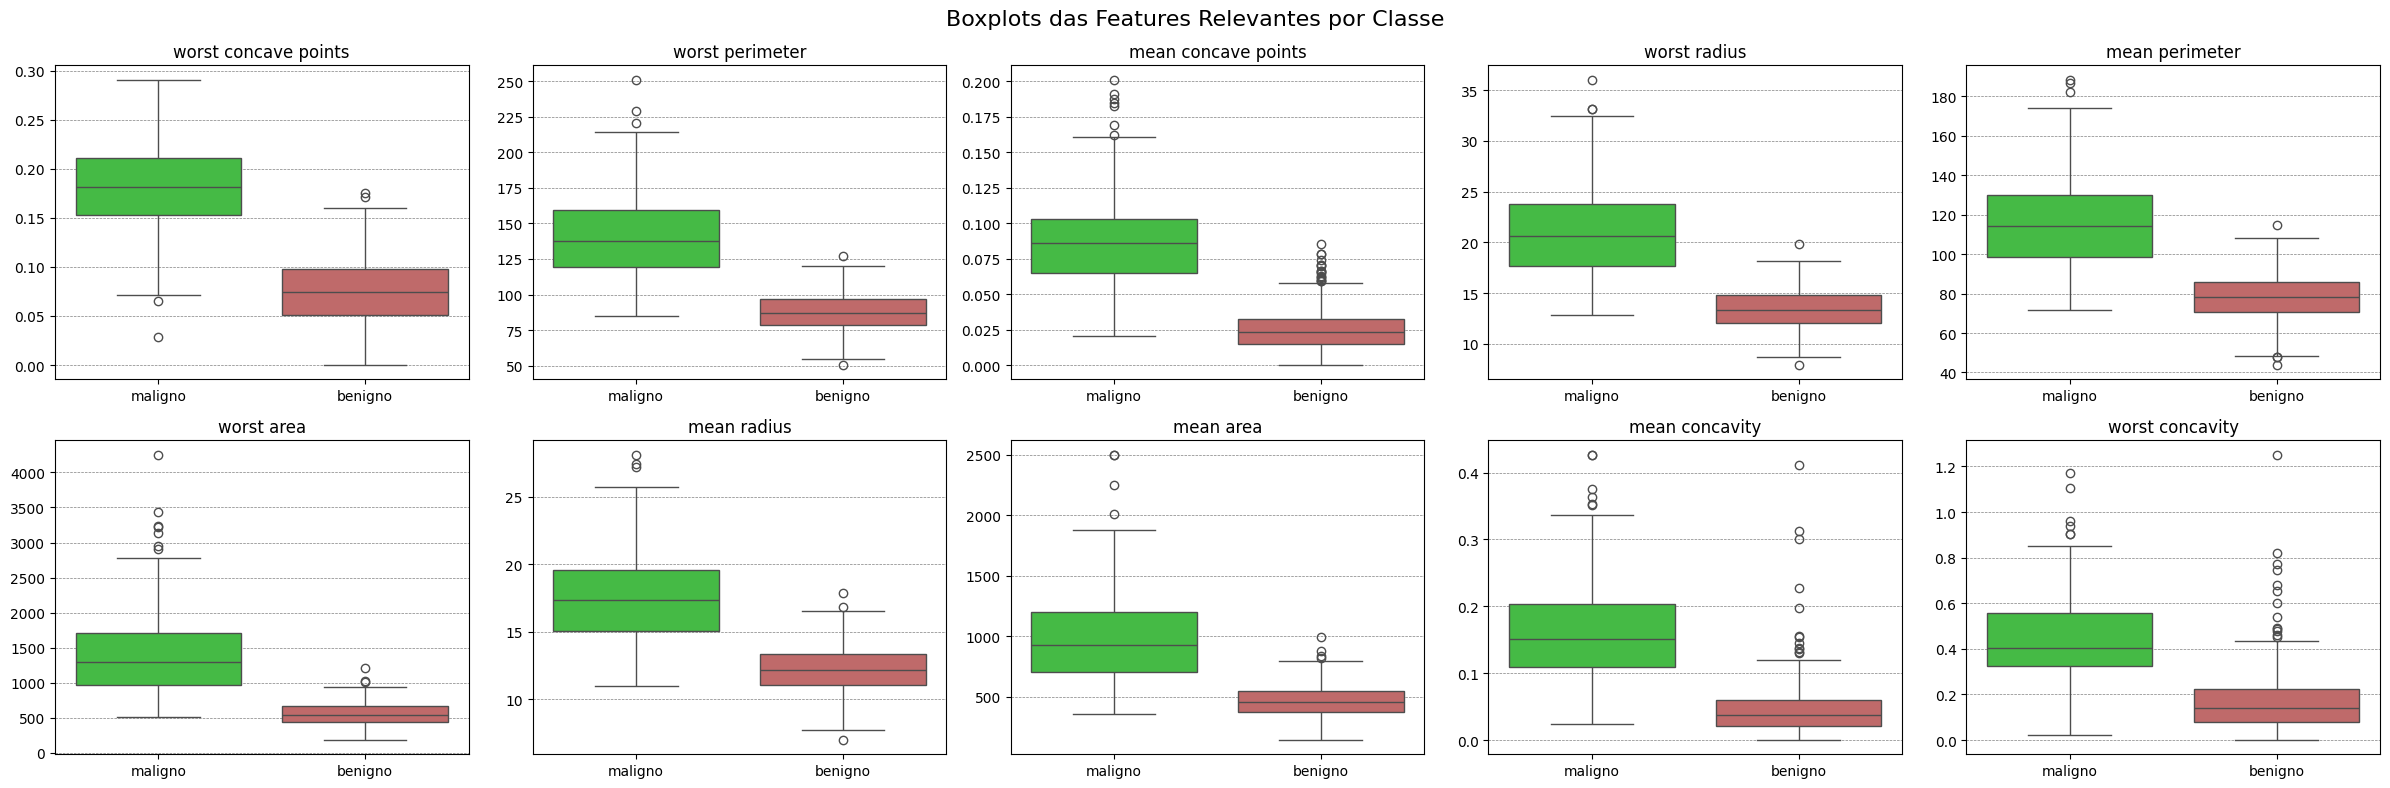

In [15]:
# BOXPLOTS COMPARATIVOS ENTRE BENIGNO/MALIGNO
fig, axs = plt.subplots(2, 5, figsize=(24, 8))
for i, ax in enumerate(axs.flatten()):
    sns.boxplot(x='diagnostico', y=x_cols_sorted[i], data=df, ax=ax, palette=palette)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(x_cols_sorted[i])
    ax.grid(which='both', axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.suptitle("Boxplots das Features Relevantes por Classe", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
# ESCALAR OS DADOS
scaler = StandardScaler()
Xs = scaler.fit_transform(df[x_cols_sorted])
y = df['target'].values

# LEAVE ONE OUT
loo = LeaveOneOut()
n_features = len(x_cols_sorted)

# LOOP DE TREINAMENTO
np.random.seed(random_seed)
accuracy_list = []
ix_loo = 0

for n_feature in range(1, n_features + 1):
    for k in ks:
        for train_index, test_index in loo.split(Xs):
            X_train, X_test = Xs[train_index][:, :n_feature], Xs[test_index][:, :n_feature]
            y_train, y_test = y[train_index], y[test_index]

            # FIT DO MODELO
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric, weights=weights, n_jobs=-1)
            knn.fit(X_train, y_train)

            # PREDIÇÃO E AVALIAÇÃO
            y_pred = knn.predict(X_test)
            train_accuracy = accuracy_score(y_train, knn.predict(X_train))
            test_hit = accuracy_score(y_test, y_pred)

            accuracy_list.append({
                'f': n_feature,
                'k': k,
                'fk': f'{n_feature}_{k}',
                'accuracy': train_accuracy,
                'hit': test_hit,
                'knn': knn
            })

        print(f'Finalizado: f={n_feature}, k={k}')

# RESULTADOS COMO DATAFRAME
df_resultados = pd.DataFrame(accuracy_list)
display(df_resultados.groupby('fk')[['accuracy', 'hit']].mean().sort_values(by='hit', ascending=False))


Finalizado: f=1, k=1
Finalizado: f=1, k=3
Finalizado: f=1, k=5
Finalizado: f=1, k=7
Finalizado: f=1, k=9
Finalizado: f=1, k=11
Finalizado: f=2, k=1
Finalizado: f=2, k=3
Finalizado: f=2, k=5
Finalizado: f=2, k=7
Finalizado: f=2, k=9
Finalizado: f=2, k=11
Finalizado: f=3, k=1
Finalizado: f=3, k=3
Finalizado: f=3, k=5
Finalizado: f=3, k=7
Finalizado: f=3, k=9
Finalizado: f=3, k=11
Finalizado: f=4, k=1
Finalizado: f=4, k=3
Finalizado: f=4, k=5
Finalizado: f=4, k=7
Finalizado: f=4, k=9
Finalizado: f=4, k=11
Finalizado: f=5, k=1
Finalizado: f=5, k=3
Finalizado: f=5, k=5
Finalizado: f=5, k=7
Finalizado: f=5, k=9
Finalizado: f=5, k=11
Finalizado: f=6, k=1
Finalizado: f=6, k=3
Finalizado: f=6, k=5
Finalizado: f=6, k=7
Finalizado: f=6, k=9
Finalizado: f=6, k=11
Finalizado: f=7, k=1
Finalizado: f=7, k=3
Finalizado: f=7, k=5
Finalizado: f=7, k=7
Finalizado: f=7, k=9
Finalizado: f=7, k=11
Finalizado: f=8, k=1
Finalizado: f=8, k=3
Finalizado: f=8, k=5
Finalizado: f=8, k=7
Finalizado: f=8, k=9
Finali

,accuracy,hit
fk,,
8_3,0.971884,0.963093
7_3,0.973635,0.961336
6_3,0.970123,0.956063
5_11,0.956085,0.954306
9_3,0.973610,0.954306
5_3,0.963121,0.954306
6_11,0.954309,0.952548
7_11,0.956069,0.952548
8_5,0.968347,0.952548


In [18]:

import pandas
# CONVERT TO DATAFRAME
accuracies = pandas.DataFrame(accuracy_list)

accuracies



,f,k,fk,accuracy,hit,knn
0,1,1,1_1,0.982394,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
1,1,1,1_1,0.980634,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
2,1,1,1_1,0.980634,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
3,1,1,1_1,0.980634,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
4,1,1,1_1,0.980634,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
...,...,...,...,...,...,...
34135,10,11,10_11,0.954225,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
34136,10,11,10_11,0.954225,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
34137,10,11,10_11,0.954225,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
34138,10,11,10_11,0.954225,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."


In [19]:
# Agrupar métricas por combinação feature-k
loo_estimation = df_resultados[['fk', 'hit', 'accuracy']].groupby(['fk']).agg(['mean', 'std']).reset_index()

# Renomear colunas
loo_estimation.columns = ['fk', 'hit', 'std_hit', 'accuracy', 'std_accuracy']

# Calcular intervalo de confiança (2 desvios padrão)
loo_estimation['upper'] = [min(upper, 1.0) for upper in loo_estimation['hit'] + 2 * loo_estimation['std_hit']]
loo_estimation['lower'] = [max(lower, 0.0) for lower in loo_estimation['hit'] - 2 * loo_estimation['std_hit']]

# Ordenar e identificar o "vencedor"
loo_estimation = loo_estimation.sort_values(['hit', 'lower', 'accuracy'], ascending=[False, False, False]).reset_index(drop=True)
winner = loo_estimation.loc[0, :]

# Exibir a tabela dos melhores resultados
display(loo_estimation.head(10))
print("Melhor combinação encontrada:")
print(winner)


,fk,hit,std_hit,accuracy,std_accuracy,upper,lower
0,8_3,0.963093,0.188699,0.971884,0.000394,1.0,0.585695
1,7_3,0.961336,0.192963,0.973635,0.000388,1.0,0.575409
2,6_3,0.956063,0.205135,0.970123,0.000446,1.0,0.545794
3,9_3,0.954306,0.209005,0.973610,0.000390,1.0,0.536296
4,5_3,0.954306,0.209005,0.963121,0.000470,1.0,0.536296
5,5_11,0.954306,0.209005,0.956085,0.000502,1.0,0.536296
6,8_5,0.952548,0.212790,0.968347,0.000500,1.0,0.526968
7,7_11,0.952548,0.212790,0.956069,0.000466,1.0,0.526968
8,6_11,0.952548,0.212790,0.954309,0.000416,1.0,0.526968
9,7_5,0.950791,0.216495,0.970083,0.000455,1.0,0.517801


Melhor combinação encontrada:
fk                   8_3
hit             0.963093
std_hit         0.188699
accuracy        0.971884
std_accuracy    0.000394
upper                1.0
lower           0.585695
Name: 0, dtype: object


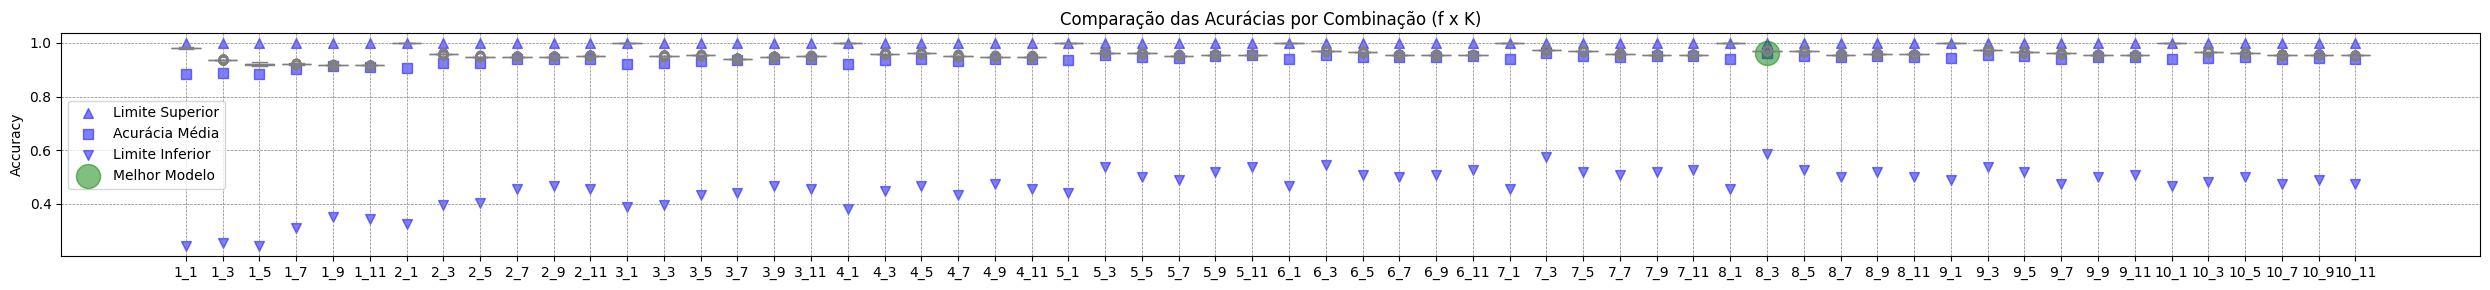

In [20]:
# Gráfico de comparação de acurácias por combinação f-k
fig = plt.figure(figsize=(25, 3))
ax = fig.add_subplot(111)

# Boxplot por combinação fk
sns.boxplot(x='fk', y='accuracy', data=df_resultados, ax=ax, color='lightgray')

# Título e eixos
ax.set_title('Comparação das Acurácias por Combinação (f x K)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('')

# Grade e anotações
ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

# Pontos de intervalo de confiança
ax.scatter(loo_estimation.fk, loo_estimation["upper"], color='blue', marker='^', s=50, alpha=0.5, label='Limite Superior')
ax.scatter(loo_estimation.fk, loo_estimation.hit, color='blue', marker='s', s=50, alpha=0.5, label='Acurácia Média')
ax.scatter(loo_estimation.fk, loo_estimation["lower"], color='blue', marker='v', s=50, alpha=0.5, label='Limite Inferior')

# Destacar o vencedor
ax.scatter(winner.fk, winner.hit, color='green', marker='o', s=300, alpha=0.5, label='Melhor Modelo')

ax.legend()
plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

split_size = 0.2
# Recuperar melhores parâmetros
winner_f, winner_k = winner.fk.split('_')
winner_f = int(winner_f)
winner_k = int(winner_k)

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(
    Xs[:, :winner_f],
    y,
    test_size=split_size,
    random_state=random_seed
)

# Treinar o modelo final
knn = KNeighborsClassifier(
    n_neighbors=winner_k,
    metric=distance_metric,
    weights=weights,
    n_jobs=-1
)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)
winner_train_accuracy = accuracy_score(y_train, knn.predict(X_train))
winner_test_accuracy = accuracy_score(y_test, y_pred)
winner_all_accuracy = accuracy_score(y, knn.predict(Xs[:, :winner_f]))

# Previsão para todos os dados
winner_y_pred = knn.predict(Xs[:, :winner_f])


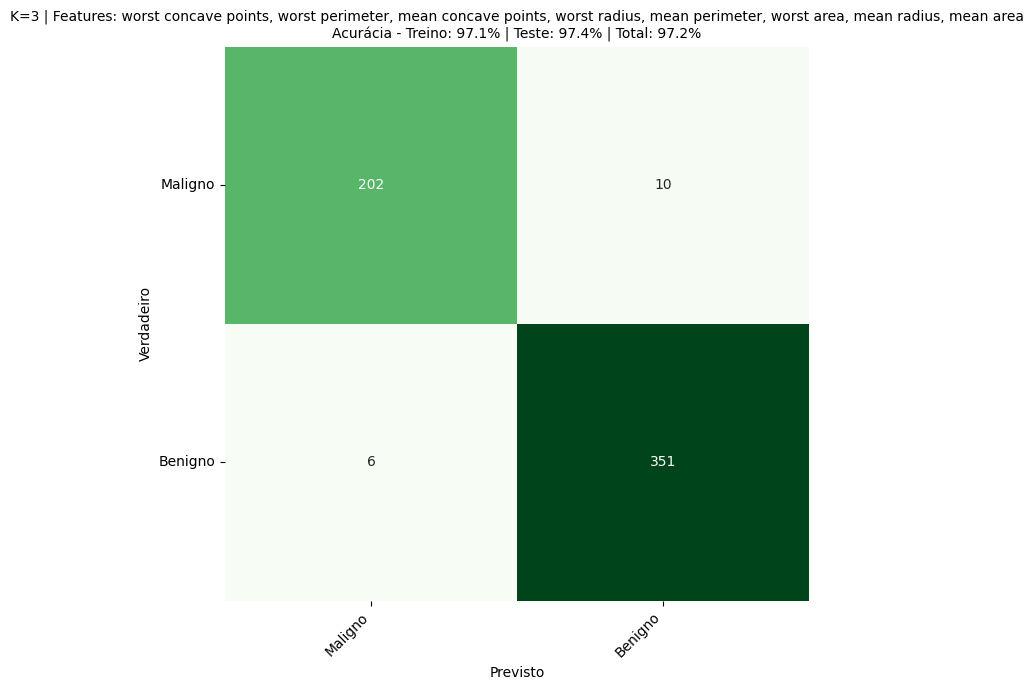

In [24]:
# Plot da matriz de confusão
fig = plt.figure(figsize=(7, 7))
conf_matrix = confusion_matrix(y, winner_y_pred)

ax = fig.add_subplot(111)
sns.heatmap(conf_matrix, annot=True, cmap='Greens', cbar=False, ax=ax, fmt='d')

# Eixos e rótulos
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro')
ax.set_xticklabels(['Maligno', 'Benigno'], rotation=45, ha='right')
ax.set_yticklabels(['Maligno', 'Benigno'], rotation=0, ha='right')

# Título
best_feat_string = ', '.join(x_cols_sorted[:winner_f])
ax.set_title(
    f'K={winner_k} | Features: {best_feat_string}\n'
    f'Acurácia - Treino: {winner_train_accuracy:.1%} | Teste: {winner_test_accuracy:.1%} | Total: {winner_all_accuracy:.1%}',
    size=10
)

plt.tight_layout()
plt.show()
